In [8]:
from src.helper import get_split_data
import pandas as pd

In [9]:
X_trn, y_trn, X_val, y_val, X_tst, y_tst = get_split_data.split_data_for_training(4)

X = pd.concat([X_trn, X_val], axis='index')
y = pd.Series([*y_trn, *y_val], index=X.index)

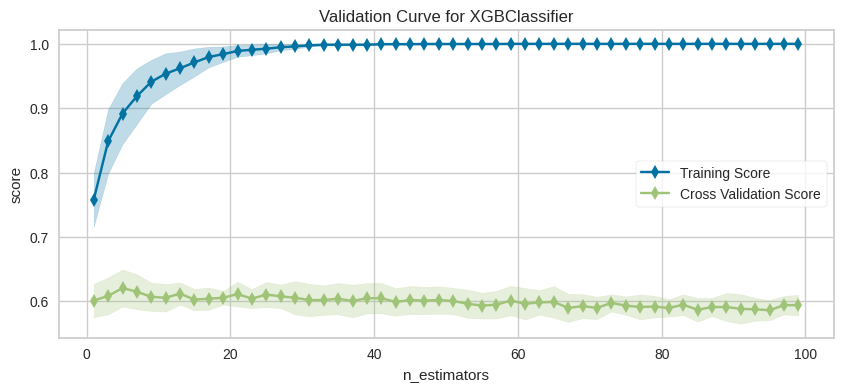

In [10]:
from sklearn.model_selection import TimeSeriesSplit
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from yellowbrick.model_selection import validation_curve
import xgboost as xgb

tscv = TimeSeriesSplit(n_splits=3)

fig, ax = plt.subplots(figsize=(10,4))
viz = validation_curve(xgb.XGBClassifier(random_state=42), X=X, y=y, param_name='n_estimators', param_range=range(1, 100, 2), scoring='accuracy', cv=tscv, ax=ax)

In [11]:
rf_xg = xgb.XGBRFClassifier(random_state=42, n_estimators=54)
rf_xg.fit(X_trn, y_trn)
rf_xg.score(X_val, y_val)

0.6